<a href="https://colab.research.google.com/github/Ishnu01/Academic/blob/main/Binary_ion_complex_plasma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

interactive(children=(FloatSlider(value=0.22, continuous_update=False, description='Primary ion(a) plasma freq…

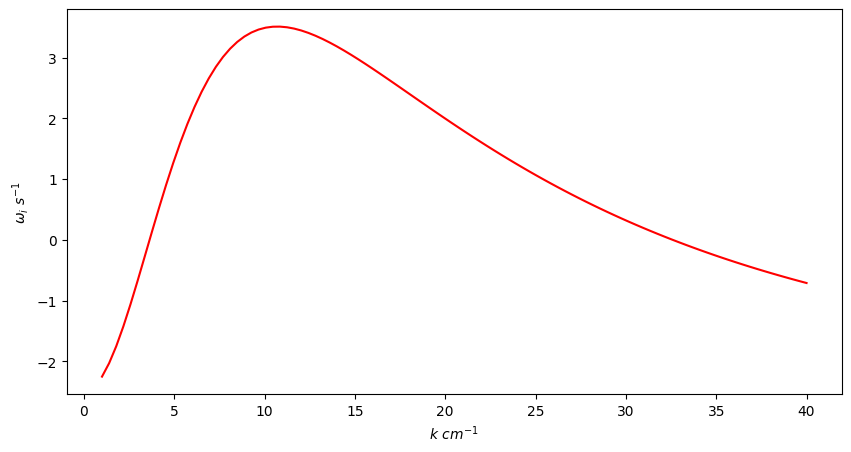

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import *

plt.rcParams["figure.figsize"]=(10,5)
def plasmaplot(ompa,ompb,vta,vtb,va0,vb0,nuan,nubn,vd0,chib, real):
  ompa = ompa* 10**6 #------------------=======plasma frequency of ion type a
  va0 = va0*10**4    #------------------=====streaming velocity of ion type a
  vta = vta* 10**4   #--------------------=====Thermal velocity of ion type a
  nuan = nuan* 10**6 #-----------====neutral collision frquency of ion type a

  ompb = ompb* 10**6 #------------------=======plasma frequency of ion type b
  vb0 = vb0*10**4    #------------------=====streaming velocity of ion type b
  vtb = vtb* 10**4   #--------------------=====Thermal velocity of ion type b
  nubn = nubn* 10**6 #-----------====neutral collision frquency of ion type b

  lambda_de = 0.12   #--------------==========electron Debye length

  ompd = 150         #-------------------=====dust plasma frequency
  nudn = 5           #--------=====dust neutral collision frequency
  vd0 = vd0*10**4    #-----------------------======velocity of dust

  k = np.linspace(1,40,100)        #--------------======Wave number

  if chib:
    chi_b = (ompb**2/((-k*vb0)*(-k*vb0+1j*nubn)-k**2*vtb**2))    #--------secondary ion susceptibility
  else:
    chi_b = 0

  a = 1 + (1 / (k**2 * lambda_de**2)) - (ompa**2/((-k*va0)*(-k*va0+1j*nuan)-k**2*vta**2 )) - chi_b
  omega_m = 1/2*( 2*k*vd0-1j*nudn + np.sqrt((2*k*vd0 - 1j*nudn)**2-4*(k**2*vd0**2 - 1j*nudn*k*vd0 - ompd**2/a)))

  if real:
    plt.plot(k, omega_m.real, c ='g')
    plt.xlabel(r"$k$ $cm^{-1}$")
    plt.ylabel(r"$\omega_r$ $s^{-1}$")
  else:
    plt.plot(k, omega_m.imag, c ='r')
    plt.xlabel(r"$k$ $cm^{-1}$")
    plt.ylabel(r"$\omega_i$ $s^{-1}$")

style = {'description_width': 'initial'}

interact(plasmaplot,
         ompa = widgets.FloatSlider(value=0.22,
                                     min=0, max=5, step=0.2,
                                     description='Primary ion(a) plasma frequency:',
                                     style=style, layout=Layout(width='50%', left='2.7%'),
                                     continuous_update=False),
         ompb = widgets.FloatSlider(value=0.22,
                                     min=0, max=5, step=0.2,
                                     description='Secondary ion(b) plasma frequency:',
                                     style=style, layout=Layout(width='50%', left='2.7%'),
                                     continuous_update=False),
         vta = widgets.FloatSlider(value=2.7,
                                     min=0, max=5, step=0.2,
                                     description='Primary ion(a) thermal velocity:',
                                     style=style, layout=Layout(width='50%', left='2.7%'),
                                     continuous_update=False),
         vtb = widgets.FloatSlider(value=2.7,
                                     min=0, max=5, step=0.2,
                                     description='Secondary ion(b) thermal velocity:',
                                     style=style, layout=Layout(width='50%', left='2.7%'),
                                     continuous_update=False),
         va0 = widgets.FloatSlider(value=1.25,
                                     min=0, max=100, step=0.5,
                                     description='Primary ion(a) drift:',
                                     style=style, layout=Layout(width='50%', left='2.7%'),
                                     continuous_update=False),
         vb0 = widgets.FloatSlider(value=1.25,
                                     min=0, max=100, step=0.5,
                                     description='Secondary ion(b) drift:',
                                     style=style, layout=Layout(width='50%', left='2.7%'),
                                     continuous_update=False),
         nuan = widgets.FloatSlider(value=2,
                                     min=0, max=10, step=1,
                                     description='Primary ion(a) plasma frquency:',
                                     style=style, layout=Layout(width='50%', left='2.7%'),
                                     continuous_update=False),
         nubn = widgets.FloatSlider(value=2,
                                     min=0, max=10, step=1,
                                     description='secondary ion(b) plasma frequency:',
                                     style=style, layout=Layout(width='50%', left='2.7%'),
                                     continuous_update=False),
         vd0 = widgets.FloatSlider(value=0,
                                     min=0, max=10000, step=0.2,
                                     description='Dust velocity:',
                                     style=style, layout=Layout(width='50%', left='5%'),
                                     continuous_update=False),

         chib= widgets.Checkbox(value=False, description="Secondary ion (b):",
                                style = style, continuous_update=False),

         real= widgets.Checkbox(value=False, description="Check for real part:",
                                style = style, continuous_update=False)

        );